# 导入工具包

In [39]:
# opencv-python
import cv2

# mediapipe人工智能工具包
import mediapipe as mp

# 进度条库
from tqdm import tqdm

# 时间库
import time

# 导入python绘图matplotlib
import matplotlib.pyplot as plt
# 使用ipython的魔法方法，将绘制出的图像直接嵌入在notebook单元格中
%matplotlib inline

本代码的mediapipe版本为0.8.9.3

In [35]:
# !pip install mediapipe==0.8.9.3 -i http://mirrors.aliyun.com/pypi/simple/

In [40]:
# 查看mediapipe版本
!pip show mediapipe

Name: mediapipe
Version: 0.8.9
Summary: MediaPipe is the simplest way for researchers and developers to build world-class ML solutions and applications for mobile, edge, cloud and the web.
Home-page: https://github.com/google/mediapipe
Author: The MediaPipe Authors
Author-email: mediapipe@google.com
License: Apache 2.0
Location: /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages
Requires: absl-py, attrs, matplotlib, numpy, opencv-contrib-python, protobuf, six, wheel
Required-by: 


In [41]:
# 定义可视化图像函数
def look_img(img):
    '''opencv读入图像格式为BGR，matplotlib可视化格式为RGB，因此需将BGR转RGB'''
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()

# 导入BlazeFace人脸检测模型

In [42]:
mp_face_detection = mp.solutions.face_detection

In [5]:
help(mp_face_detection.FaceDetection)

Help on class FaceDetection in module mediapipe.python.solutions.face_detection:

class FaceDetection(mediapipe.python.solution_base.SolutionBase)
 |  FaceDetection(min_detection_confidence=0.5, model_selection=0)
 |  
 |  MediaPipe Face Detection.
 |  
 |  MediaPipe Face Detection processes an RGB image and returns a list of the
 |  detected face location data.
 |  
 |  Please refer to
 |  https://solutions.mediapipe.dev/face_detection#python-solution-api
 |  for usage examples.
 |  
 |  Method resolution order:
 |      FaceDetection
 |      mediapipe.python.solution_base.SolutionBase
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, min_detection_confidence=0.5, model_selection=0)
 |      Initializes a MediaPipe Face Detection object.
 |      
 |      Args:
 |        min_detection_confidence: Minimum confidence value ([0.0, 1.0]) for face
 |          detection to be considered successful. See details in
 |          https://solutions.mediapipe.dev/face_det

In [43]:
model = mp_face_detection.FaceDetection(   
        min_detection_confidence=0.5, # 置信度阈值，过滤掉小于置信度的预测框
        model_selection=0,            # 选择模型，0适用于人脸距离镜头近（2米以内），1适用于人脸距离镜头远（5米以内）
)

> 如果模型导入报SSL、Timeout、Network Error之类的bug，是因为模型权重文件下载时出现网络问题，可从https://github.com/google/mediapipe
下载模型权重文件，然后复制粘贴到Mediapipe的安装目录中

> 如果报其它错误，可将报错最后一句放在百度、谷歌等搜索引擎搜索

# 读入图像

In [44]:
# 从图片文件读入图像，opencv读入为BGR格式
img = cv2.imread('images/A-0.jpeg')

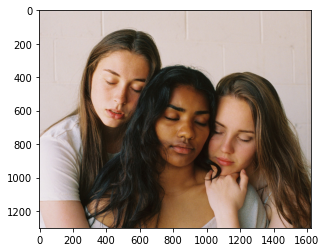

In [45]:
look_img(img)

# 将图像输入模型，获取预测结果

In [46]:
# BGR转RGB
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 将RGB图像输入模型，获取预测结果
results = model.process(img_RGB)

In [47]:
results

mediapipe.python.solution_base.SolutionOutputs

In [48]:
# 人脸预测结果
results.detections

[label_id: 0
 score: 0.9498377442359924
 location_data {
   format: RELATIVE_BOUNDING_BOX
   relative_bounding_box {
     xmin: 0.1718713492155075
     ymin: 0.2578398585319519
     width: 0.22891630232334137
     height: 0.28610169887542725
   }
   relative_keypoints {
     x: 0.267341673374176
     y: 0.33216360211372375
   }
   relative_keypoints {
     x: 0.3546595871448517
     y: 0.364169716835022
   }
   relative_keypoints {
     x: 0.3117963969707489
     y: 0.42476582527160645
   }
   relative_keypoints {
     x: 0.2929651439189911
     y: 0.47466403245925903
   }
   relative_keypoints {
     x: 0.18545641005039215
     y: 0.31960126757621765
   }
   relative_keypoints {
     x: 0.3756771981716156
     y: 0.3867529630661011
   }
 },
 label_id: 0
 score: 0.9398595094680786
 location_data {
   format: RELATIVE_BOUNDING_BOX
   relative_bounding_box {
     xmin: 0.4074995517730713
     ymin: 0.43037283420562744
     width: 0.21761226654052734
     height: 0.27197402715682983
   }


# 可视化人脸检测结果

In [49]:
# 导入可视化函数和可视化样式
mp_drawing = mp.solutions.drawing_utils

# 关键点样式
keypoint_style = mp_drawing.DrawingSpec(thickness=5, circle_radius=5, color=(0,255,0))

# 人脸预测框样式
bbox_style = mp_drawing.DrawingSpec(thickness=5, circle_radius=5, color=(255,0,0))

In [50]:
# 可视化人脸框和人脸关键点
annotated_image = img.copy()
for detection in results.detections:
    mp_drawing.draw_detection(annotated_image, 
                              detection,
                              keypoint_drawing_spec=keypoint_style,
                              bbox_drawing_spec=bbox_style)

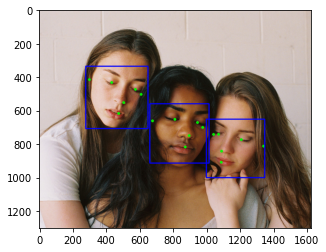

In [51]:
look_img(annotated_image)

# 整理代码

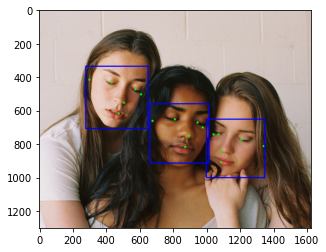

True

In [52]:
# opencv-python
import cv2
# mediapipe人工智能工具包
import mediapipe as mp
# 进度条库
from tqdm import tqdm
# 时间库
import time

# 导入python绘图matplotlib
import matplotlib.pyplot as plt
# 使用ipython的魔法方法，将绘制出的图像直接嵌入在notebook单元格中
%matplotlib inline

# 定义可视化图像函数
def look_img(img):
    '''opencv读入图像格式为BGR，matplotlib可视化格式为RGB，因此需将BGR转RGB'''
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()

# 导入人脸检测模型
mp_face_detection = mp.solutions.face_detection
model = mp_face_detection.FaceDetection(   
        min_detection_confidence=0.5, # 置信度阈值，过滤掉小于置信度的预测框
        model_selection=0,            # 选择模型，0适用于人脸距离镜头近（2米以内），1适用于人脸距离镜头远（5米以内）
)


# 导入可视化函数和可视化样式
mp_drawing = mp.solutions.drawing_utils
# 关键点样式
keypoint_style = mp_drawing.DrawingSpec(thickness=5, circle_radius=3, color=(0,255,0))
# 人脸预测框样式
bbox_style = mp_drawing.DrawingSpec(thickness=5, circle_radius=3, color=(255,0,0))

# 从图片文件读入图像，opencv读入为BGR格式
img = cv2.imread('images/A-0.jpeg')
# BGR转RGB
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# 将RGB图像输入模型，获取预测结果
results = model.process(img_RGB)

# 可视化人脸框和人脸关键点
annotated_image = img.copy()
for detection in results.detections:
    mp_drawing.draw_detection(annotated_image, 
                              detection,
                              keypoint_drawing_spec=keypoint_style,
                              bbox_drawing_spec=bbox_style)
    
look_img(annotated_image)
cv2.imwrite('Test-A.jpg',annotated_image)

# 小作业：换模型参数、换置信度参数、换图片、换各种人脸，测试人脸检测效果